In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ["region", "townsize", "gender", "agecat", "edcat", "jobcat", "marital", "spousedcat", "empcat", "retire", 
"lninc", "debtinc", "inccat", "lncreddebt", "lnothdebt", "carcatvalue", "telecommute", "cardmon", "wiremon", "multline", 
"voice", "internet", "callwait", "forward", "confer", "reason", "cardspent", "churn", "tenure", "longmon", "tollmon", 
"ownpc", "owntv","ebill", "reside", "hometype", "addresscat", "custid", "response_01", "response_02", "response_03"]

In [28]:
df = pd.read_spss("case1_T42021.sav")
df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,filter_$
0,3964-QJWTRG-NPN,Zone 1,"50,000-249,999",Female,20.0,18-24,September,15.0,Some college,Managerial and Professional,...,No,No,Yes,Yes,No,No,No,Yes,No,1.0
1,5195-TLUDJE-HVO,Zone 3,"2,500-9,999",Female,67.0,>65,June,14.0,High school degree,Sales and Office,...,No,No,No,No,No,Yes,No,No,No,1.0
2,4459-VLPQUH-3OL,Zone 4,"10,000-49,999",Male,23.0,18-24,May,16.0,Some college,Sales and Office,...,No,Yes,Yes,Yes,No,Yes,Yes,No,No,1.0
3,7432-QKQFJJ-K72,Zone 2,"< 2,500",Female,52.0,50-64,July,14.0,High school degree,Managerial and Professional,...,No,Yes,Yes,No,No,No,No,No,No,1.0
4,8959-RZWRHU-ST8,Zone 3,"2,500-9,999",Female,44.0,35-49,October,16.0,Some college,Managerial and Professional,...,No,No,No,No,No,Yes,No,No,No,1.0


In [29]:
df = df[cols]
df.head()
df.shape

(4000, 41)

In [7]:
df[cols].replace('No','0',inplace=True)
df[cols].replace('Yes','1',inplace=True)

In [8]:
df.head()

,region,townsize,gender,agecat,edcat,jobcat,marital,spousedcat,empcat,retire,...,ownpc,owntv,ebill,reside,hometype,addresscat,custid,response_01,response_02,response_03
0,Zone 1,"50,000-249,999",Female,18-24,Some college,Managerial and Professional,Unmarried,NaN,Less than 2,0,...,0,1,0,3.0,Multiple-Family,Less than 3,3964-QJWTRG-NPN,0,1,0
1,Zone 3,"2,500-9,999",Female,>65,High school degree,Sales and Office,Married,High school degree,More than 15,0,...,0,1,0,3.0,Single-family,More than 25,5195-TLUDJE-HVO,0,0,0
2,Zone 4,"10,000-49,999",Male,18-24,Some college,Sales and Office,Married,College degree,Less than 2,0,...,1,1,1,5.0,Condominium/Townhouse,4 to 7,4459-VLPQUH-3OL,1,0,0
3,Zone 2,"< 2,500",Female,50-64,High school degree,Managerial and Professional,Unmarried,NaN,6 to 10,0,...,1,1,0,1.0,Condominium/Townhouse,16 to 25,7432-QKQFJJ-K72,0,0,0
4,Zone 3,"2,500-9,999",Female,35-49,Some college,Managerial and Professional,Married,Some college,11 to 15,0,...,0,1,0,2.0,Condominium/Townhouse,16 to 25,8959-RZWRHU-ST8,0,0,0


### 1. Data Processing

#### 1.1. Missing Values

In [9]:
# function to find missing values in datafame
def missing_values_table(df):
    # sum of missing values
    mis_val = df.isnull().sum()
        
    # % of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
        
    # concat table
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% Missing Values'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0
                                                             ].sort_values('% Missing Values', ascending=False).round(1)
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [10]:
missing_values_table(df).head()

,Missing Values,% Missing Values
reason,3258,81.4
spousedcat,2040,51.0
carcatvalue,395,9.9
townsize,2,0.0
lncreddebt,1,0.0


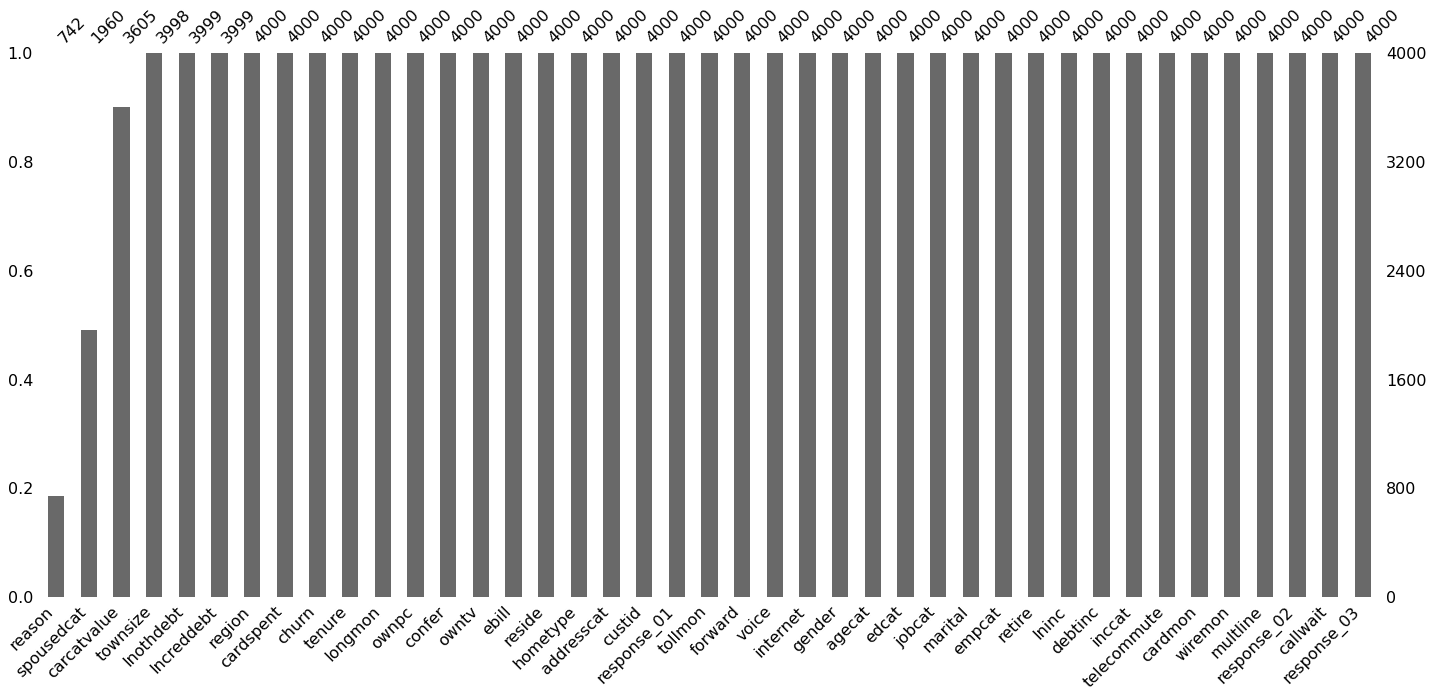

In [12]:
msno.bar(df, sort = 'ascending', labels = True);

In [13]:
df.head()

,region,townsize,gender,agecat,edcat,jobcat,marital,spousedcat,empcat,retire,...,ownpc,owntv,ebill,reside,hometype,addresscat,custid,response_01,response_02,response_03
0,Zone 1,"50,000-249,999",Female,18-24,Some college,Managerial and Professional,Unmarried,NaN,Less than 2,0,...,0,1,0,3.0,Multiple-Family,Less than 3,3964-QJWTRG-NPN,0,1,0
1,Zone 3,"2,500-9,999",Female,>65,High school degree,Sales and Office,Married,High school degree,More than 15,0,...,0,1,0,3.0,Single-family,More than 25,5195-TLUDJE-HVO,0,0,0
2,Zone 4,"10,000-49,999",Male,18-24,Some college,Sales and Office,Married,College degree,Less than 2,0,...,1,1,1,5.0,Condominium/Townhouse,4 to 7,4459-VLPQUH-3OL,1,0,0
3,Zone 2,"< 2,500",Female,50-64,High school degree,Managerial and Professional,Unmarried,NaN,6 to 10,0,...,1,1,0,1.0,Condominium/Townhouse,16 to 25,7432-QKQFJJ-K72,0,0,0
4,Zone 3,"2,500-9,999",Female,35-49,Some college,Managerial and Professional,Married,Some college,11 to 15,0,...,0,1,0,2.0,Condominium/Townhouse,16 to 25,8959-RZWRHU-ST8,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   region       4000 non-null   category
 1   townsize     3998 non-null   category
 2   gender       4000 non-null   category
 3   agecat       4000 non-null   category
 4   edcat        4000 non-null   category
 5   jobcat       4000 non-null   category
 6   marital      4000 non-null   category
 7   spousedcat   1960 non-null   category
 8   empcat       4000 non-null   category
 9   retire       4000 non-null   category
 10  lninc        4000 non-null   float64 
 11  debtinc      4000 non-null   float64 
 12  inccat       4000 non-null   category
 13  lncreddebt   3999 non-null   float64 
 14  lnothdebt    3999 non-null   float64 
 15  carcatvalue  3605 non-null   category
 16  telecommute  4000 non-null   category
 17  cardmon      4000 non-null   float64 
 18  wiremon      4000 non-null  

#### 1.2. Imputation of missing values

In [15]:
df['spousedcat'] = df['spousedcat'].fillna(df['spousedcat'].mode()[0])
df['carcatvalue'] = df['carcatvalue'].fillna(df['carcatvalue'].mode()[0])

In [16]:
missing_values_table(df).head()

,Missing Values,% Missing Values
reason,3258,81.4
townsize,2,0.0
lncreddebt,1,0.0
lnothdebt,1,0.0


#### 1.3. Outlier Detection

In [17]:
# get only numeric features
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# https://www.ibm.com/support/pages/boxplots-hinges-and-quartiles
# John Tukey (1977)
df_numeric = df.select_dtypes(include='number')

<AxesSubplot:xlabel='variable', ylabel='value'>

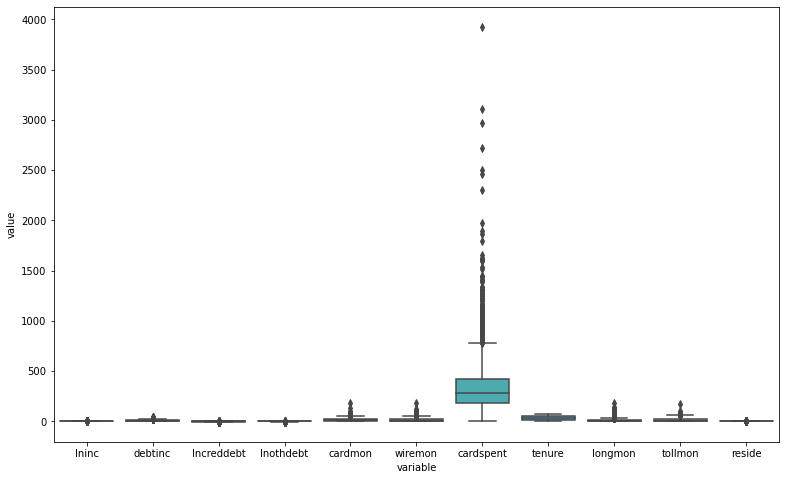

In [24]:
sns.boxplot(x="variable", y="value", data=pd.melt(df_numeric))

In [18]:
z = np.abs(stats.zscore(df_numeric))
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
boston_df_out = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
df_numeric.shape

(4000, 11)

In [20]:
boston_df_out.shape

(3226, 11)

### 2. Data Visualization

#### 2.1. Heatmaps

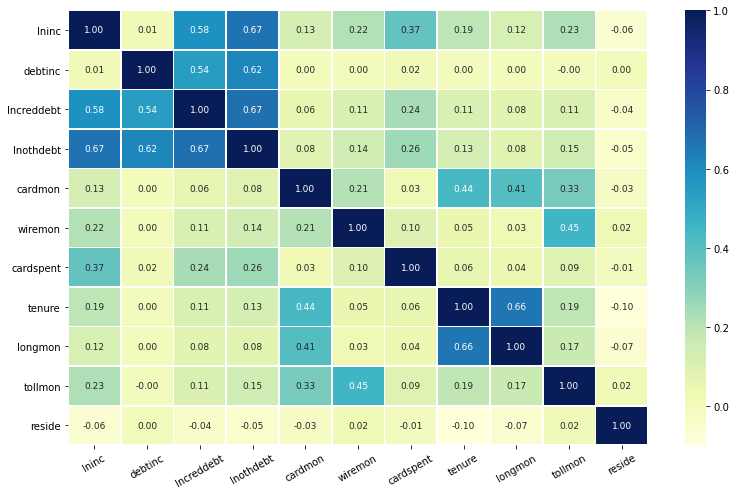

In [21]:
df_corr = df.corr()
plt.rcParams["figure.figsize"] = (13,8)
g = sns.heatmap(df_corr, annot=True, annot_kws={"size": 9}, linewidth=0.6, fmt=".2f", cmap="YlGnBu", linewidths=5, 
                xticklabels=True, yticklabels=True)
g.set_xticklabels(g.get_xticklabels(), rotation=30) 
plt.show()

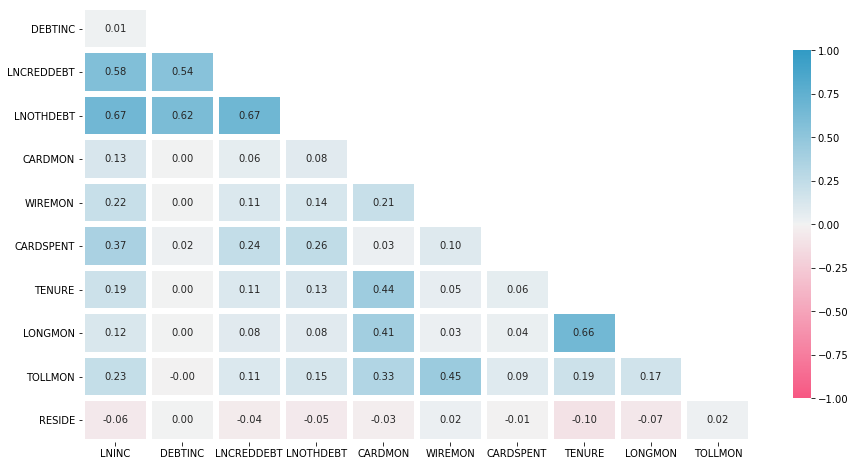

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=False)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
#plt.title(title, loc='left', fontsize=18)
plt.show()

#### 2.2. Pairplots

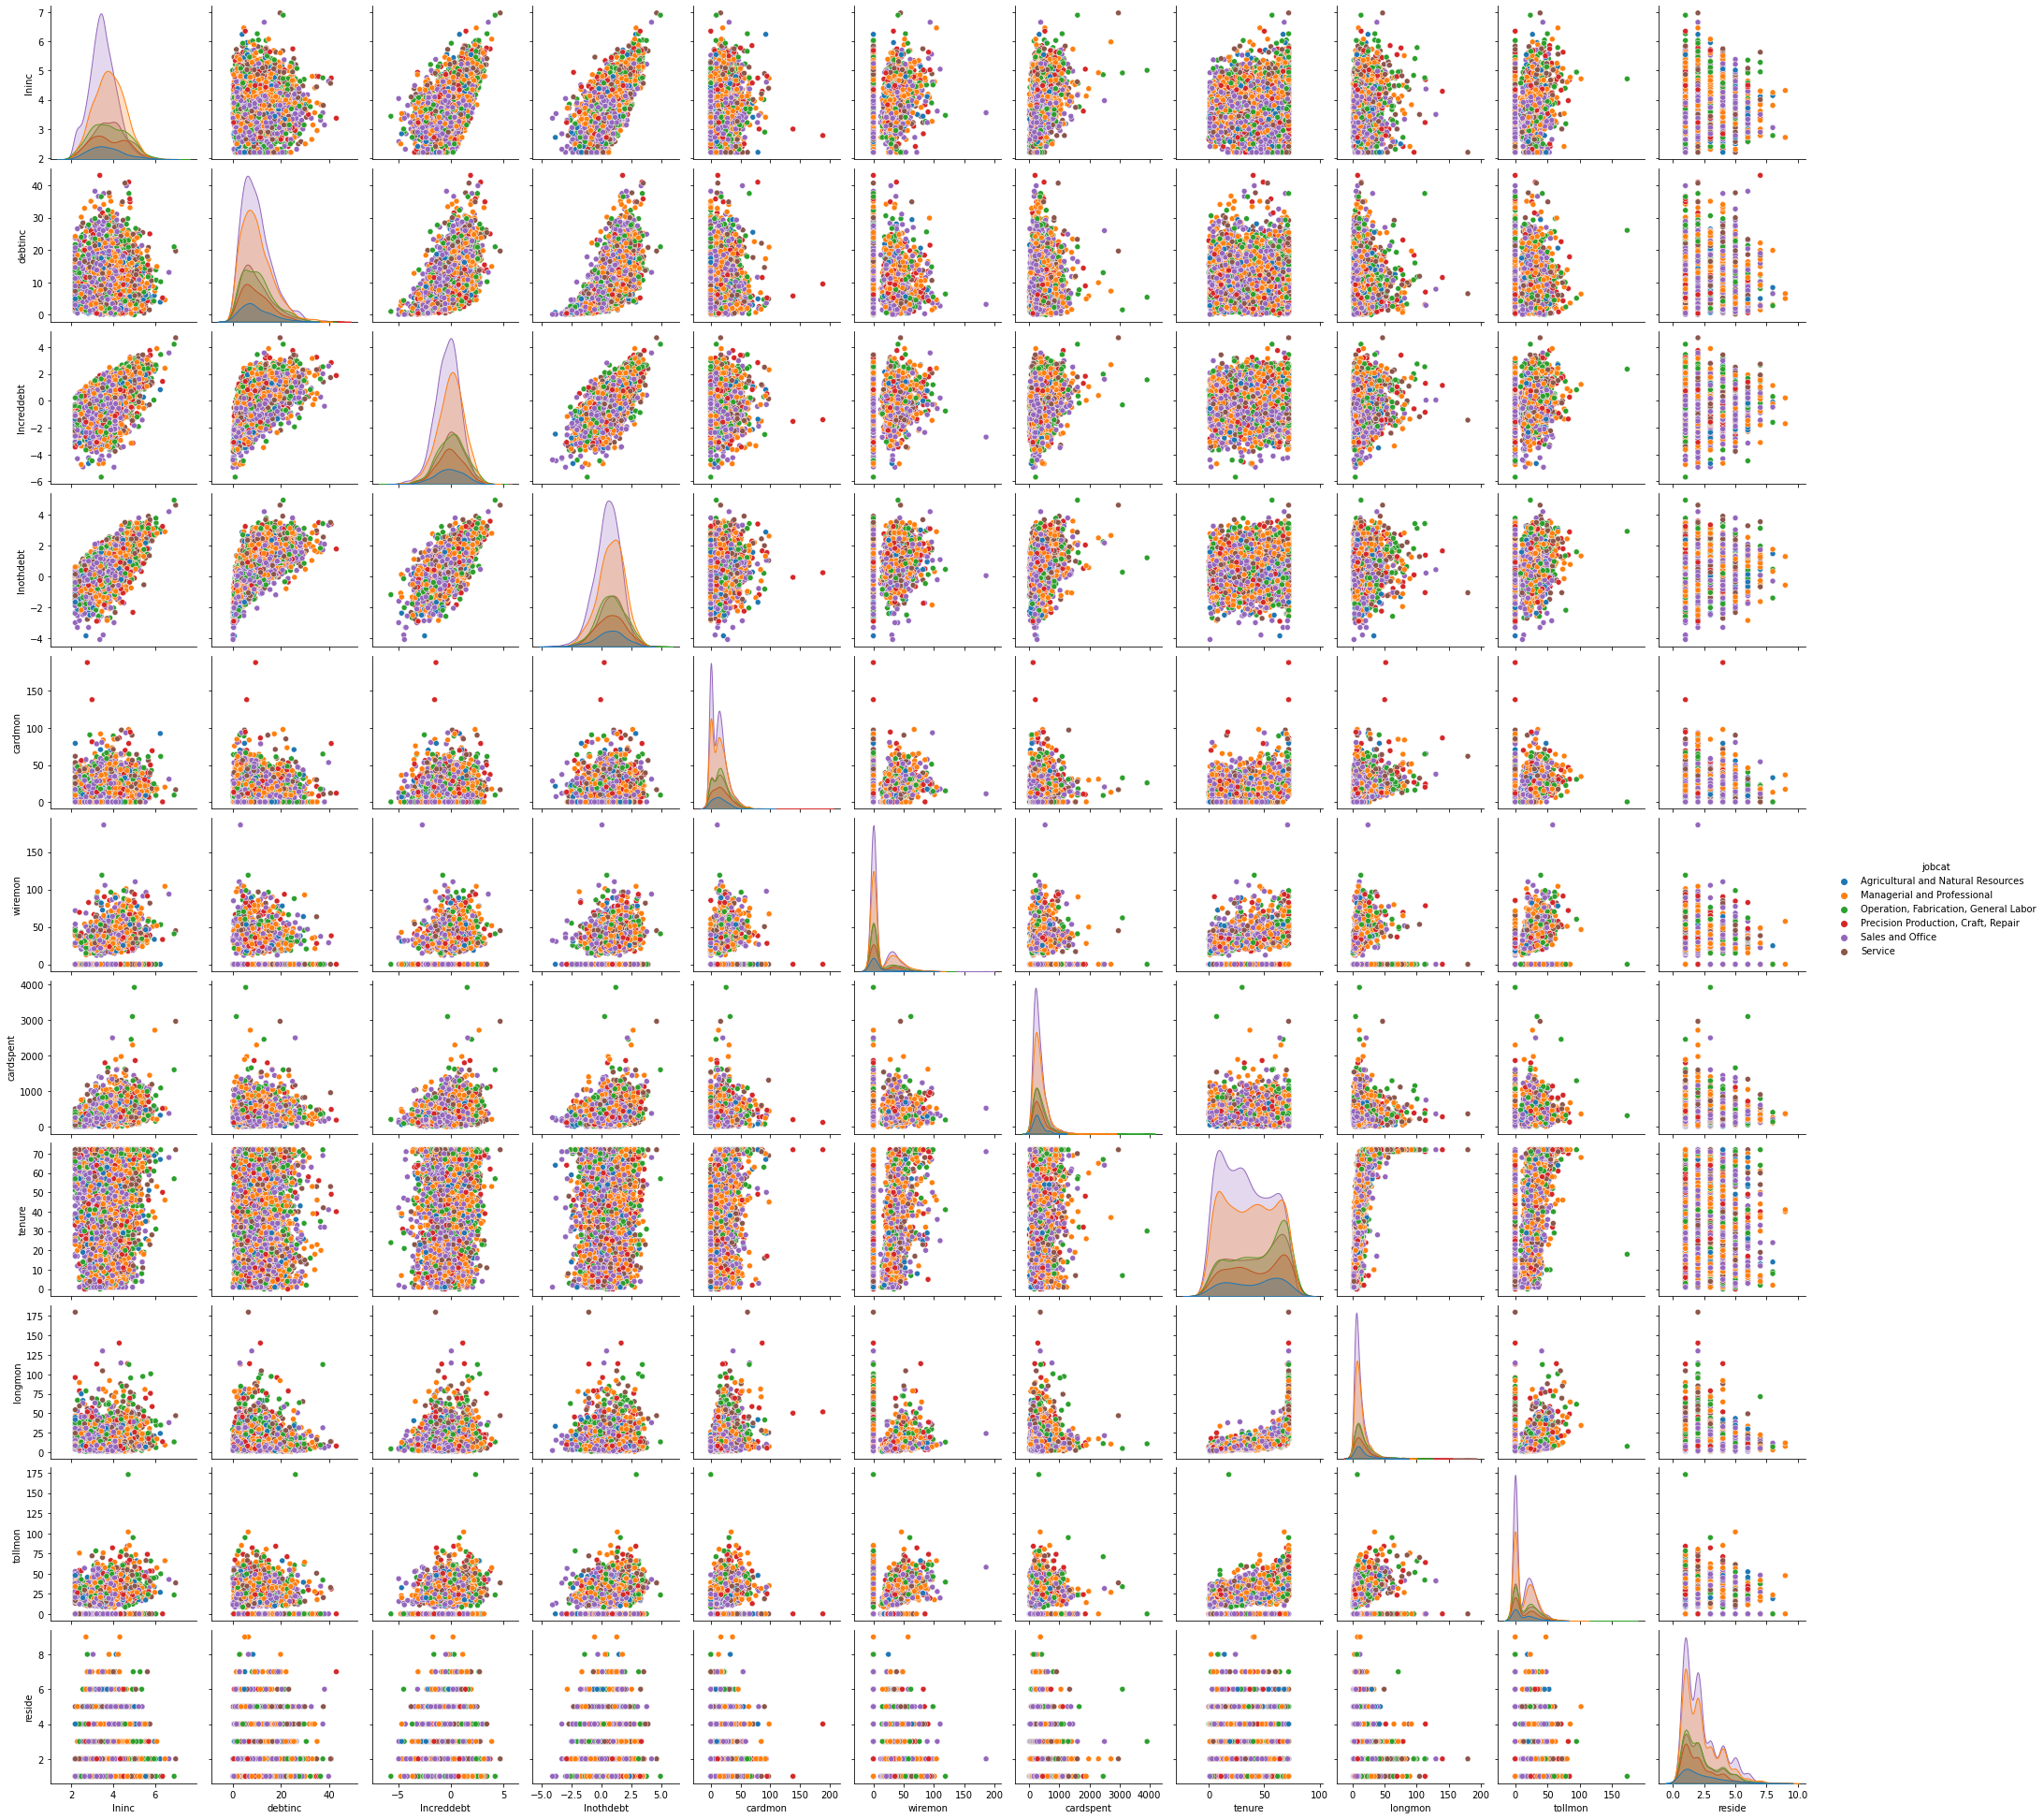

In [23]:
sns.pairplot(df, hue="jobcat")